In [3]:
from matplotlib import pyplot as plt
import numpy as np
from os.path import join, abspath
from hammer import dm
from time import time
import pandas as pd
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
from utils import plot_chain, plot_corner, style

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
style()

# Potential

In [5]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [1]
R = [3.4E-3]
zsun = [20]
w0 = [-7.]
log_sigmaw = [np.log(5.)]
log_a = [np.log(1.)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw + log_a]).flatten()
theta.shape

(31,)

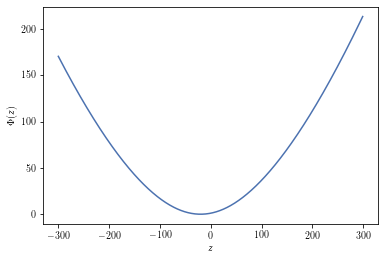

In [6]:
z_start = -300
z_end = 300
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


# Vertical density profile

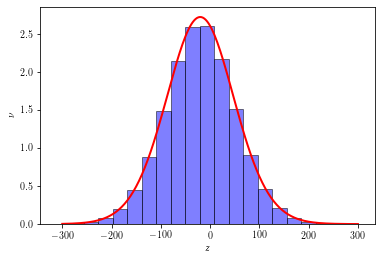

In [7]:
z = np.linspace(-300, 300, 205)
dz = z[10] - z[0]
fz = dm.fz(z[::10], theta, dz)
fz_smooth = dm.fz(z, theta, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

# Vertical velocity dispersion profile

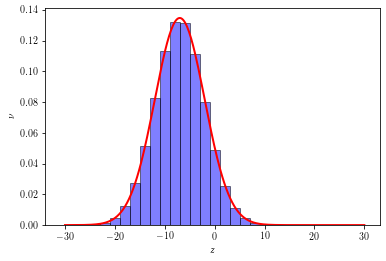

In [8]:
w = np.linspace(-30, 30, 300)
dw = w[10] - w[0]
fw = dm.fw(w[::10], theta, dz)
fw_smooth = dm.fw(w, theta, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

## Generate mock data

In [12]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [1]
R = [3.4E-3]
zsun = [20]
w0 = [-7.]
log_sigmaw = [np.log(5.)]
log_a = [np.log(1.)]
theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw + log_a]).flatten()
theta.shape

(31,)

In [9]:
N = 5000

z = np.random.randn(N)*500
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

# Z[0], W[0] # z changes along the columns, w along the rows

(5000, 2)

In [10]:
pot = dm.fzw(pos, theta, dz)
pot.shape

(5000,)

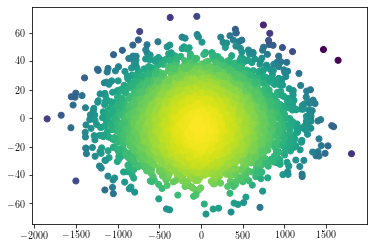

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')

In [13]:
N = 16

z = np.random.randn(N)*500
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

let's sample using MCMC

In [14]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

chain = dm.sample(10000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
chain.shape

(10000, 16, 2)

100%|██████████| 2/2 [00:00<00:00, 79.73it/s]


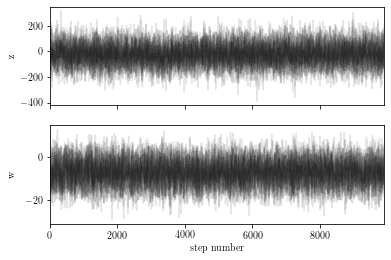

In [15]:
labels = ["z", "w"]
plot_chain(chain, labels, burn=100, figsize=(6, 4))

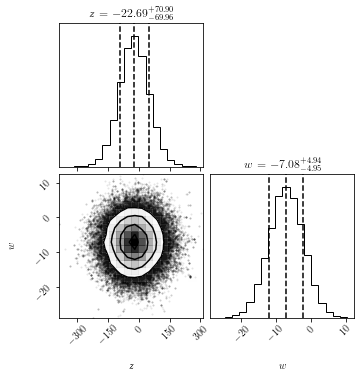

In [16]:
plot_corner(chain, burn=100, labels=[r'$z$', r'$w$'])

Sample even further

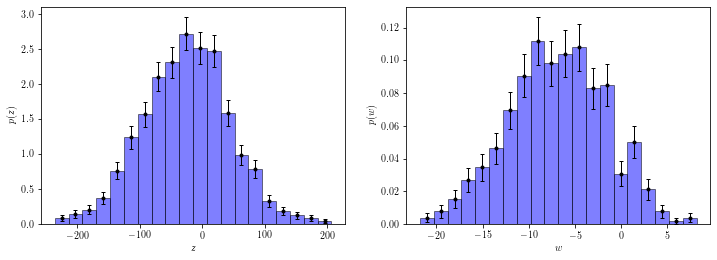

(1000, 519)

In [17]:
Nz = 1000

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()
# randomly sample z
index = np.random.randint(0, len(z), Nz)
z_sample = z[index]
w_sample = w[index]

zbound = 50
mask = (z_sample > -zbound) & (z_sample < zbound)
w_sample = w_sample[mask]

znum, zedge = np.histogram(z_sample, bins=20)
ztot = znum.sum()
zmid = (zedge[:-1]+zedge[1:])/2
mask = znum > 0
znum = znum[mask]
zmid = zmid[mask]
zerr = np.sqrt(znum)
nor = znum.max()/np.exp(log_nu0)
znum, zerr = znum/nor, zerr/nor
zdata = (zmid, znum, zerr)

wnum, wedge = np.histogram(w_sample, bins=20)
wtot = wnum.sum()
wmid = (wedge[:-1]+wedge[1:])/2
mask = wnum > 0
wnum = wnum[mask]
wmid = wmid[mask]
werr = np.sqrt(wnum)
wnum, werr = wnum/np.sum(wnum), werr/np.sum(wnum)
wdata = (wmid, wnum, werr)

# plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].errorbar(*zdata, fmt='.', color='k', capsize=2, lw=1)
axes[0].bar(zmid, znum, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
axes[1].errorbar(*wdata, fmt='.', color='k', capsize=2, lw=1)
axes[1].bar(wmid, wnum, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
axes[0].set_xlabel(r'$z$')
axes[1].set_xlabel(r'$w$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()
ztot, wtot

# 2 components

now assume double gaussian vertical velocity dispersion

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from os.path import join, abspath
from hammer import dm
from time import time
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
from utils import plot_chain, plot_corner, style

In [19]:
style()

In [20]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [1]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(.6)]
log_sigmaw2 = [np.log(6.)]
log_a2 = [np.log(0.4)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

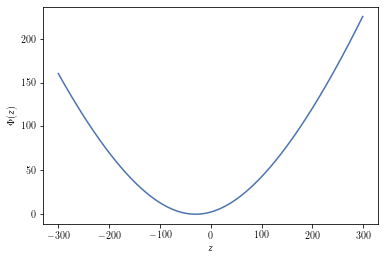

In [21]:
z_start = -300
z_end = 300
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


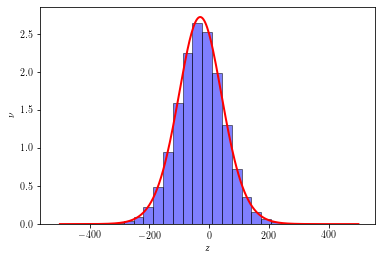

In [22]:
z = np.linspace(-500, 500, 305)
dz = z[10] - z[0]
fz = dm.fz(z[::10], theta, dz)
fz_smooth = dm.fz(z, theta, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

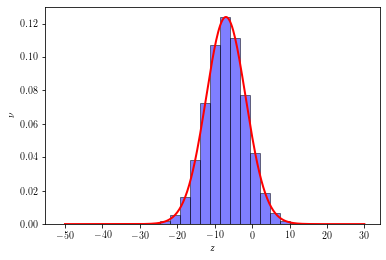

In [23]:
w = np.linspace(-50, 30, 300)
dw = w[10] - w[0]
fw = dm.fw(w[::10], theta, dz)
fw_smooth = dm.fw(w, theta, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

## Sample

In [24]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [1]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(.6)]
log_sigmaw2 = [np.log(6.)]
log_a2 = [np.log(0.4)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [28]:
N = 5000

z = np.random.randn(N)*200
w = np.random.randn(N)*15
dz = 1
pos = np.array([z, w]).T
pos.shape

(5000, 2)

In [29]:
pot = dm.fzw(pos, theta, dz)
pot.shape

(5000,)

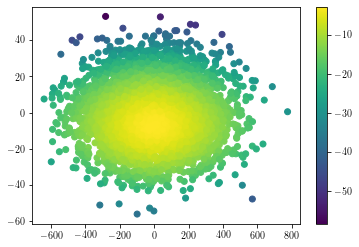

In [30]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

In [31]:
# number of walkers
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [32]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = dm.sample(20000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
print(time() - t0, "s")

39.158292293548584 s


100%|██████████| 2/2 [00:00<00:00, 59.91it/s]


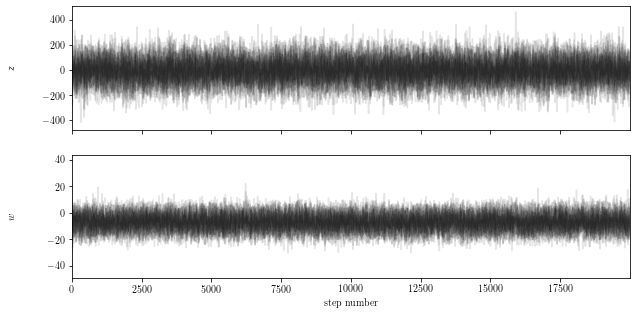

In [33]:
plot_chain(chain, labels=[r'$z$', r'$w$'], figsize=(10, 5))

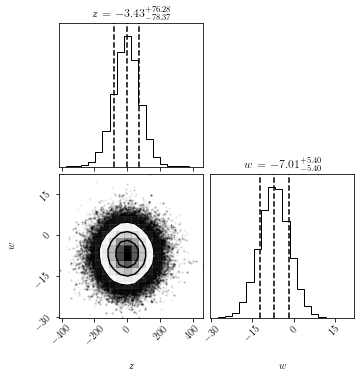

In [34]:
plot_corner(chain, burn=100, labels=[r'$z$', r'$w$'])

# different $z$, $N=1000$

figure out the size of the generated data, using gaussian distribution

In [37]:
# fit z data with gaussian
from scipy.stats import norm
burn = 100
z = chain[burn:, :, 0].flatten()

zfit = norm.fit(z)
zfit

(-4.2148975100631185, 80.29525095327877)

In [38]:
import numpy as np

i = np.arange(1, 3.1, 0.5)
np.round(zfit[1]*i,2)

array([ 80.3 , 120.44, 160.59, 200.74, 240.89])

generate...

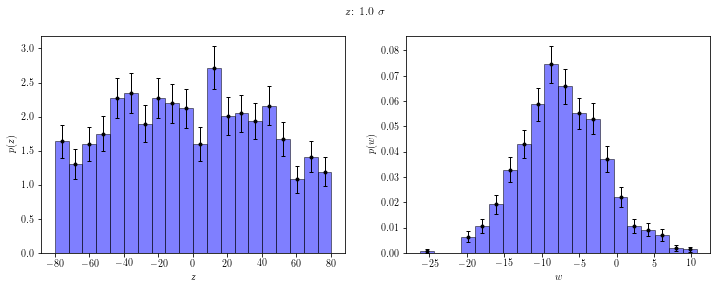

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

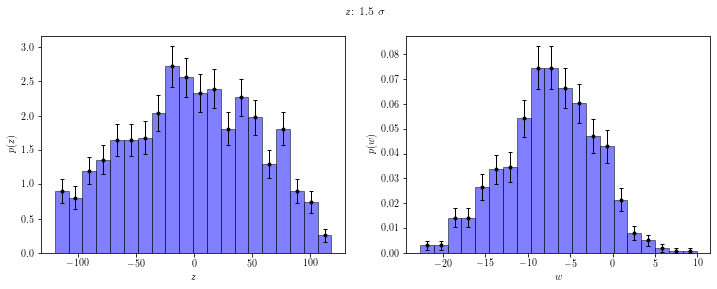

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

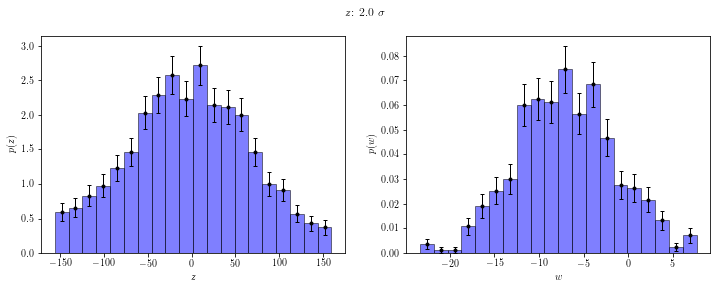

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

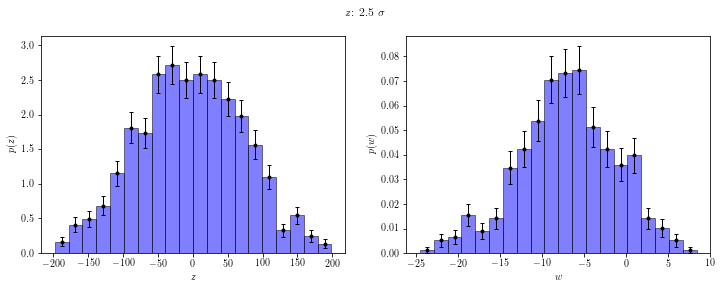

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

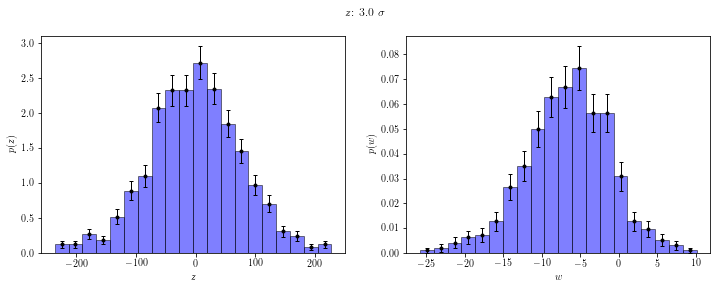

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [40]:
import vaex

sigma_z = zfit[1]

Nz = 1000
burn = 100
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
for i in np.arange(1, 3.1, 0.5):
    mask = np.abs(z) < i*sigma_z
    z_sample = z[mask]
    w_sample = w[mask]
    index = np.random.randint(0, len(z_sample), Nz)
    z_sample = z_sample[index]
    w_sample = w_sample[index]

    zbound = 50
    mask = (z_sample > -zbound) & (z_sample < zbound)
    w_sample = w_sample[mask]

    znum, zedge = np.histogram(z_sample, bins=20)
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    nor = znum.max()/np.exp(log_nu0)
    znum, zerr = znum/nor, zerr/nor
    zdata = (zmid, znum, zerr)

    wnum, wedge = np.histogram(w_sample, bins=20)
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    nor = wnum.max()/(np.exp(log_a1)/(np.sqrt(2*np.pi)*np.exp(log_sigmaw1))+np.exp(log_a2)/(np.sqrt(2*np.pi)*np.exp(log_sigmaw2)))
    wnum, werr = wnum/nor, werr/nor
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].errorbar(*zdata, fmt='.', color='k', capsize=2, lw=1)
    axes[0].bar(zmid, znum, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[1].errorbar(*wdata, fmt='.', color='k', capsize=2, lw=1)
    axes[1].bar(wmid, wnum, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[0].set_xlabel(r'$z$')
    axes[1].set_xlabel(r'$w$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[1].set_ylabel(r'$p(w)$')
    fig.suptitle(r'$z$: {} $\sigma$'.format(i))
    plt.show()
    df_z = vaex.from_arrays(z=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(w=wmid, num=wnum, err=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock', 'z', f'z_{i}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock' ,'z', f'w_{i}.hdf5'), progress=True)

# different $N$, $z=2\sigma$

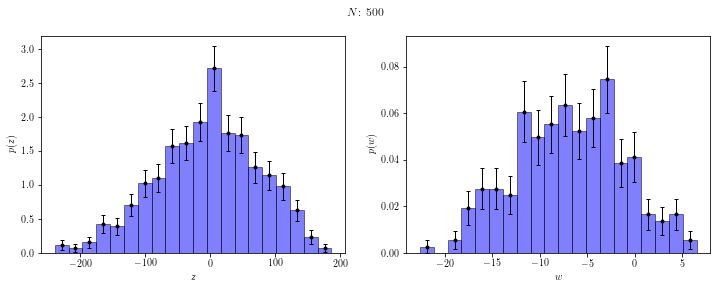

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

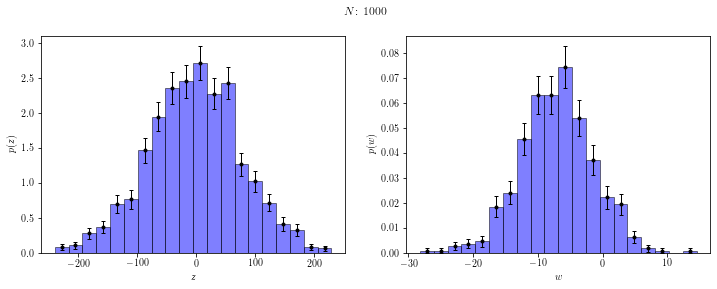

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

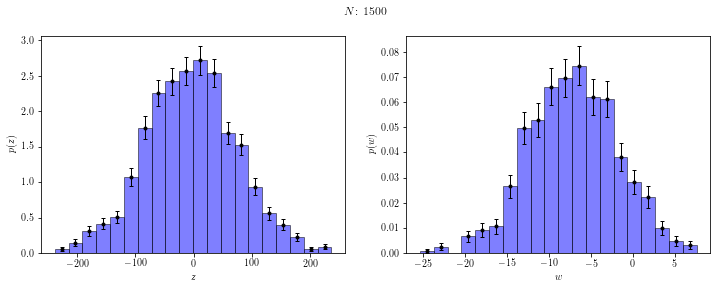

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

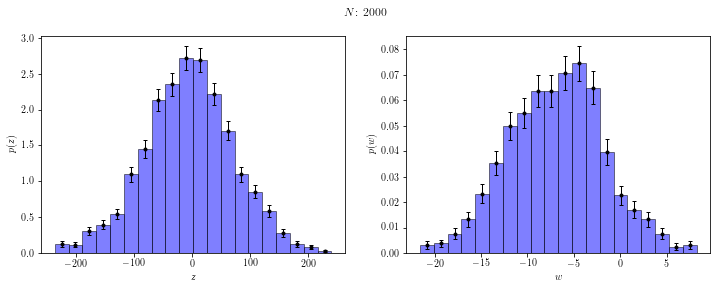

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

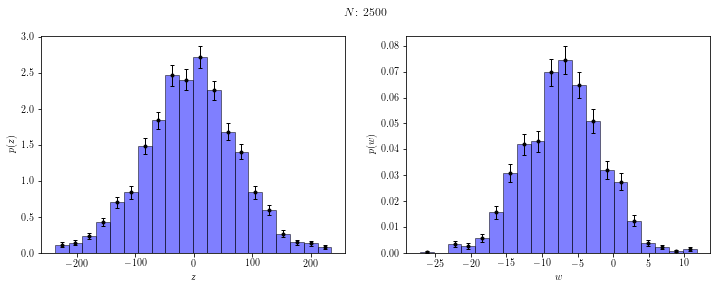

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

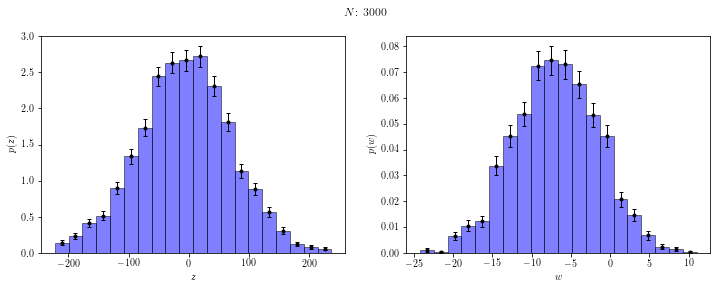

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [41]:
import vaex

sigma_z = zfit[1]

Nz = 1000
burn = 100
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < i*sigma_z
z_s = z[mask]
w_s = w[mask]
for Nz in np.arange(500, 3001, 500):
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    w_sample = w_s[index]

    zbound = 50
    mask = (z_sample > -zbound) & (z_sample < zbound)
    w_sample = w_sample[mask]

    znum, zedge = np.histogram(z_sample, bins=20)
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    nor = znum.max()/np.exp(log_nu0)
    znum, zerr = znum/nor, zerr/nor
    zdata = (zmid, znum, zerr)

    wnum, wedge = np.histogram(w_sample, bins=20)
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    nor = wnum.max()/(np.exp(log_a1)/(np.sqrt(2*np.pi)*np.exp(log_sigmaw1))+np.exp(log_a2)/(np.sqrt(2*np.pi)*np.exp(log_sigmaw2)))
    wnum, werr = wnum/nor, werr/nor
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].errorbar(*zdata, fmt='.', color='k', capsize=2, lw=1)
    axes[0].bar(zmid, znum, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[1].errorbar(*wdata, fmt='.', color='k', capsize=2, lw=1)
    axes[1].bar(wmid, wnum, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[0].set_xlabel(r'$z$')
    axes[1].set_xlabel(r'$w$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[1].set_ylabel(r'$p(w)$')
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(z=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(w=wmid, num=wnum, err=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock', 'n', f'z_{int(Nz)}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock' ,'n', f'w_{int(Nz)}.hdf5'), progress=True)

for comparison model

In [ ]:
# run this with script, save the chain
# nwalkers = pos.shape[0]
# ndim = pos.shape[1]

# t0 = time()
# chain = dm.sample(1_000_000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
# print(time() - t0, "s")

In [ ]:
import vaex

sigma_z = zfit[1]

Nz = 1000
burn = 100
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < i*sigma_z
z_s = z[mask]
w_s = w[mask]
for Nz in np.arange(500, 3001, 500):
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    w_sample = w_s[index]

    zbound = 50
    mask = (z_sample > -zbound) & (z_sample < zbound)
    w_sample = w_sample[mask]

    znum, zedge = np.histogram(z_sample, bins=20)
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    nor = znum.max()/np.exp(log_nu0)
    znum, zerr = znum/nor, zerr/nor
    zdata = (zmid, znum, zerr)

    wnum, wedge = np.histogram(w_sample, bins=20)
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    nor = wnum.max()/(np.exp(log_a1)/(np.sqrt(2*np.pi)*np.exp(log_sigmaw1))+np.exp(log_a2)/(np.sqrt(2*np.pi)*np.exp(log_sigmaw2)))
    wnum, werr = wnum/nor, werr/nor
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].errorbar(*zdata, fmt='.', color='k', capsize=2, lw=1)
    axes[0].bar(zmid, znum, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[1].errorbar(*wdata, fmt='.', color='k', capsize=2, lw=1)
    axes[1].bar(wmid, wnum, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[0].set_xlabel(r'$z$')
    axes[1].set_xlabel(r'$w$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[1].set_ylabel(r'$p(w)$')
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(z=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(w=wmid, num=wnum, err=werr)
    # df_z.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock', 'comp', f'z_{int(Nz)}.hdf5'), progress=True)
    # df_w.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock' ,'comp', f'w_{int(Nz)}.hdf5'), progress=True)